In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('Suicide_Detection.csv')

In [5]:
df.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [6]:
df['class'].value_counts()

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df.sample(5)

,text,class
98575,I don't want to die but I also don't want to l...,suicide
2432,My life has been purposelessI know this sounds...,suicide
167993,I hope this doesn’t offend anyone In my mind I...,non-suicide
173275,assistance please i’m in 8th grade and there’s...,non-suicide
7919,Ask me absolutely anything. No matter how weir...,non-suicide


In [9]:
df.shape

(232074, 2)

In [10]:
df.describe()

,text,class
count,232074,232074
unique,232074,2
top,Ex Wife Threatening SuicideRecently I left my ...,suicide
freq,1,116037


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [12]:
df.duplicated().sum()

0

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

class
suicide        116037
non-suicide    116037
Name: count, dtype: int64


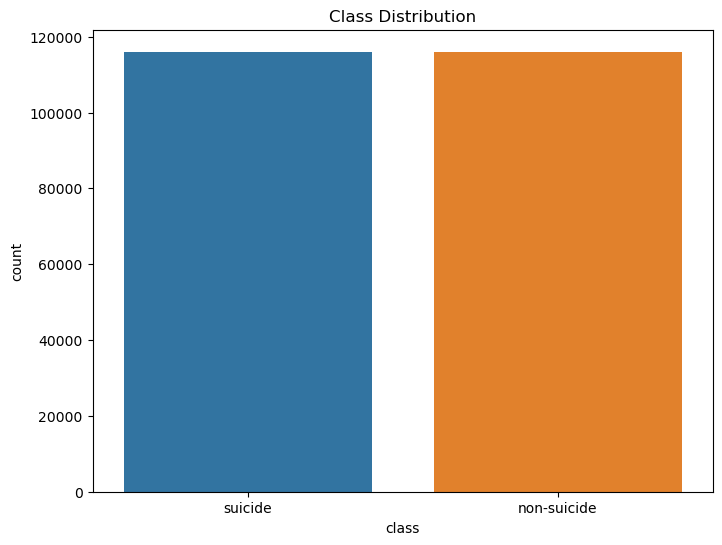

In [14]:
#Finding and visualizing the Class Distribution
class_counts = df['class'].value_counts()
print(class_counts)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='class')
plt.title('Class Distribution')
plt.show()

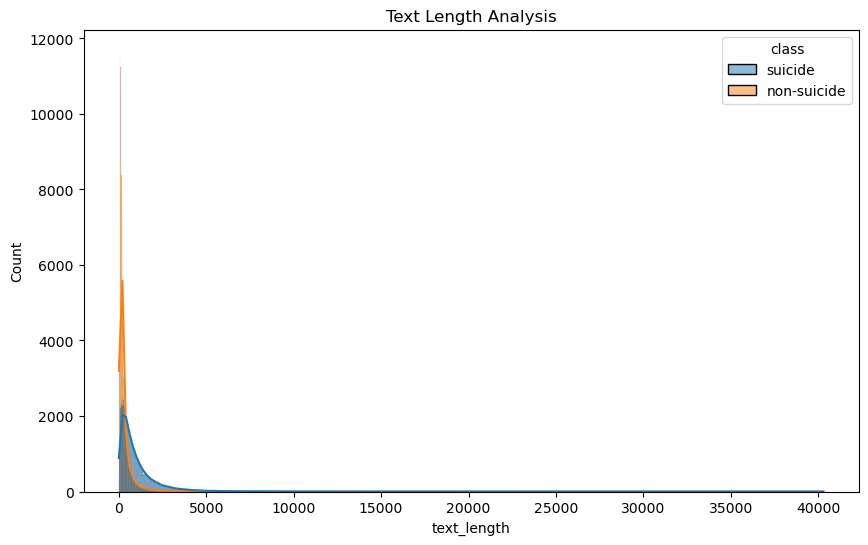

In [15]:
#Doing Text Length Analysis of both the classes
df['text_length'] = df['text'].apply(len)  # character count

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='text_length', hue='class', kde=True)
plt.title('Text Length Analysis')
plt.show()

In [16]:
df

,text,class,text_length
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,715
1,Am I weird I don't get affected by compliments...,non-suicide,138
2,Finally 2020 is almost over... So I can never ...,non-suicide,129
3,i need helpjust help me im crying so hard,suicide,41
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426
...,...,...,...
232069,If you don't like rock then your not going to ...,non-suicide,152
232070,You how you can tell i have so many friends an...,non-suicide,158
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,87
232072,The usual stuff you find hereI'm not posting t...,suicide,1834


In [17]:
df.groupby('class')['text_length'].mean()

class
non-suicide     329.218844
suicide        1050.060627
Name: text_length, dtype: float64

<Axes: xlabel='class'>

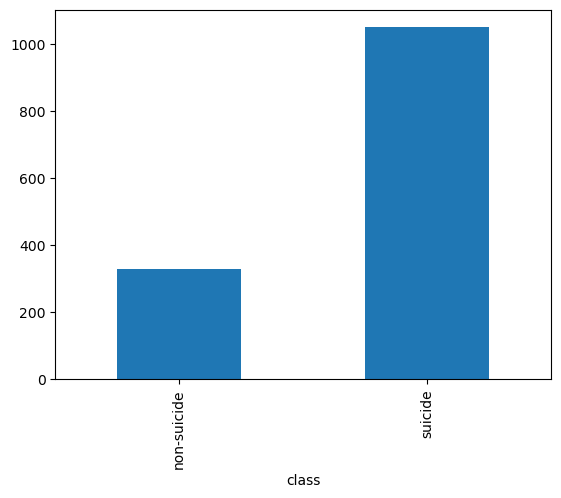

In [18]:
df.groupby('class')['text_length'].mean().plot(kind='bar')

In [19]:
df['text'][0]

"Ex Wife Threatening SuicideRecently I left my wife for good because she has cheated on me twice and lied to me so much that I have decided to refuse to go back to her. As of a few days ago, she began threatening suicide. I have tirelessly spent these paat few days talking her out of it and she keeps hesitating because she wants to believe I'll come back. I know a lot of people will threaten this in order to get their way, but what happens if she really does? What do I do and how am I supposed to handle her death on my hands? I still love my wife but I cannot deal with getting cheated on again and constantly feeling insecure. I'm worried today may be the day she does it and I hope so much it doesn't happen."

In [20]:
df

,text,class,text_length
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,715
1,Am I weird I don't get affected by compliments...,non-suicide,138
2,Finally 2020 is almost over... So I can never ...,non-suicide,129
3,i need helpjust help me im crying so hard,suicide,41
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426
...,...,...,...
232069,If you don't like rock then your not going to ...,non-suicide,152
232070,You how you can tell i have so many friends an...,non-suicide,158
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,87
232072,The usual stuff you find hereI'm not posting t...,suicide,1834


In [21]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Initialize stemmer
stemmer = PorterStemmer()

# Function to preprocess the text
def preprocess_text(text):
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove emojis
    text = re.sub(r'[^\w\s,]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    lemmatized_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # Join the lemmatized tokens back into a single string
    processed_text = ' '.join(lemmatized_tokens)
    
    return processed_text

# Apply preprocessing to the text column
df["Processed_Text"] = df['text'].apply(preprocess_text)

In [22]:
df

,text,class,text_length,Processed_Text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,715,ex wife threaten suiciderec left wife good che...
1,Am I weird I don't get affected by compliments...,non-suicide,138,weird dont get affect compliment come someon k...
2,Finally 2020 is almost over... So I can never ...,non-suicide,129,final almost never hear bad year ever swear fu...
3,i need helpjust help me im crying so hard,suicide,41,need helpjust help im cri hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,2426,im losthello name adam ive struggl year im afr...
...,...,...,...,...
232069,If you don't like rock then your not going to ...,non-suicide,152,dont like rock go get anyth go httpsmusictaste...
232070,You how you can tell i have so many friends an...,non-suicide,158,tell mani friend lone everyth depriv prebought...
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide,87,pee probabl tast like salti tea someon drank p...
232072,The usual stuff you find hereI'm not posting t...,suicide,1834,usual stuff find hereim post sympathi piti kno...


In [23]:
new_df = df[['Processed_Text', 'class']]

In [24]:
new_df

,Processed_Text,class
0,ex wife threaten suiciderec left wife good che...,suicide
1,weird dont get affect compliment come someon k...,non-suicide
2,final almost never hear bad year ever swear fu...,non-suicide
3,need helpjust help im cri hard,suicide
4,im losthello name adam ive struggl year im afr...,suicide
...,...,...
232069,dont like rock go get anyth go httpsmusictaste...,non-suicide
232070,tell mani friend lone everyth depriv prebought...,non-suicide
232071,pee probabl tast like salti tea someon drank p...,non-suicide
232072,usual stuff find hereim post sympathi piti kno...,suicide


In [25]:
from sklearn.preprocessing import LabelEncoder

# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Encoding the 'class' column
# Encode the 'class' column using .loc
new_df.loc[:, 'Encoded_Class'] = label_encoder.fit_transform(new_df['class'])

C:\Users\HP\AppData\Local\Temp\ipykernel_7376\2192852439.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[:, 'Encoded_Class'] = label_encoder.fit_transform(new_df['class'])


In [26]:
new_df

,Processed_Text,class,Encoded_Class
0,ex wife threaten suiciderec left wife good che...,suicide,1
1,weird dont get affect compliment come someon k...,non-suicide,0
2,final almost never hear bad year ever swear fu...,non-suicide,0
3,need helpjust help im cri hard,suicide,1
4,im losthello name adam ive struggl year im afr...,suicide,1
...,...,...,...
232069,dont like rock go get anyth go httpsmusictaste...,non-suicide,0
232070,tell mani friend lone everyth depriv prebought...,non-suicide,0
232071,pee probabl tast like salti tea someon drank p...,non-suicide,0
232072,usual stuff find hereim post sympathi piti kno...,suicide,1


In [27]:
# Geting the feature X
X = new_df['Processed_Text']

# Getting the target variable y (encoded class)
y = new_df['Encoded_Class']

In [28]:
X

0         ex wife threaten suiciderec left wife good che...
1         weird dont get affect compliment come someon k...
2         final almost never hear bad year ever swear fu...
3                            need helpjust help im cri hard
4         im losthello name adam ive struggl year im afr...
                                ...                        
232069    dont like rock go get anyth go httpsmusictaste...
232070    tell mani friend lone everyth depriv prebought...
232071    pee probabl tast like salti tea someon drank p...
232072    usual stuff find hereim post sympathi piti kno...
232073    still havent beaten first boss hollow knight i...
Name: Processed_Text, Length: 232074, dtype: object

In [29]:
y

0         1
1         0
2         0
3         1
4         1
         ..
232069    0
232070    0
232071    0
232072    1
232073    0
Name: Encoded_Class, Length: 232074, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train.shape

(185659,)

In [32]:
X_test.shape

(46415,)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fitting and transforming the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transforming the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [34]:
X_train_tfidf[0]

<1x147140 sparse matrix of type '<class 'numpy.float64'>'
	with 34 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
logreg_pred = logreg.predict(X_test_tfidf)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.93547344608424


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
import pickle

# Save the pickled model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [38]:
# Save the fitted TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)